Configuration pour avoir l'auto complétation avec "tab"

In [74]:
%config IPCompleter.greedy=True

In [75]:
%%bash
pip3 install plotly

In [76]:
# pour les tableaux
import numpy as np
# pour les data frames
import pandas as pd
# pour les graphes de base
import matplotlib.pyplot as plt

# pour des graphes avancés
import plotly
import plotly.express as px
import plotly.graph_objects as go

# Récupération des données

In [77]:
# https://data.grandlyon.com/jeux-de-donnees/parcs-jardins-metropole-lyon/info 

raw_data = pd.read_json(path_or_buf="com_donnees_communales.comparcjardin_1_0_0.json",orient="records")
raw_data.head()

,type,name,features
0,FeatureCollection,com_donnees_communales.comparcjardin_1_0_0,"{'type': 'Feature', 'properties': {'uid': 'PAR..."
1,FeatureCollection,com_donnees_communales.comparcjardin_1_0_0,"{'type': 'Feature', 'properties': {'uid': 'PAR..."
2,FeatureCollection,com_donnees_communales.comparcjardin_1_0_0,"{'type': 'Feature', 'properties': {'uid': 'PAR..."
3,FeatureCollection,com_donnees_communales.comparcjardin_1_0_0,"{'type': 'Feature', 'properties': {'uid': 'PAR..."
4,FeatureCollection,com_donnees_communales.comparcjardin_1_0_0,"{'type': 'Feature', 'properties': {'uid': 'PAR..."


In [78]:
raw_data.features[0]

{'type': 'Feature',
 'properties': {'uid': 'PAR-69029-001',
  'id_ariane': 'S8117',
  'nom': 'Parc du Fort de Bron',
  'num': 1,
  'numvoie': '',
  'voie': 'Chemin Vieux',
  'codepost': 69500,
  'commune': 'Bron',
  'code_insee': 69029,
  'reglement': 'Oui',
  'surf_tot_m2': 85000.0,
  'gestion': 'Commune',
  'ann_ouvert': 1983,
  'clos': 'non',
  'openinghoursspecification': '',
  'precision_horaires': '',
  'acces': '',
  'circulation': '',
  'label': 'non',
  'type_equip': 'Parcours santé | Aires de jeux',
  'eau': 'oui',
  'toilettes': 'non',
  'chien': 'Interdits-tenus en laisse ou libres',
  'esp_can': 'propreté-liberté',
  'photo': '',
  'gid': 1},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[4.9216667199399105, 45.729393905793685],
    [4.921676999656498, 45.729390131878816],
    [4.921677265836371, 45.72939039739405],
    [4.923405490282145, 45.731263244358665],
    [4.923493134403573, 45.73122206977849],
    [4.924115723383177, 45.73190115199582],
    [4.9229609413931

Prenons la première données par exemple

In [79]:
raw_data.features[0]['properties']['commune']

'Bron'

In [80]:
data_frame_features = pd.DataFrame(raw_data['features'])
data_frame_features.head()

,features
0,"{'type': 'Feature', 'properties': {'uid': 'PAR..."
1,"{'type': 'Feature', 'properties': {'uid': 'PAR..."
2,"{'type': 'Feature', 'properties': {'uid': 'PAR..."
3,"{'type': 'Feature', 'properties': {'uid': 'PAR..."
4,"{'type': 'Feature', 'properties': {'uid': 'PAR..."


Pas très joli, on va transformer ça en tableau

In [81]:
data_frame_prop = pd.json_normalize(data_frame_features['features'])
data_frame_prop.head()

,type,properties.uid,properties.id_ariane,properties.nom,properties.num,properties.numvoie,properties.voie,properties.codepost,properties.commune,properties.code_insee,properties.reglement,properties.surf_tot_m2,...,properties.acces,properties.circulation,properties.label,properties.type_equip,properties.eau,properties.toilettes,properties.chien,properties.esp_can,properties.photo,properties.gid,geometry.type,geometry.coordinates
0,Feature,PAR-69029-001,S8117,Parc du Fort de Bron,1,,Chemin Vieux,69500,Bron,69029,Oui,85000.0,...,,,non,Parcours santé | Aires de jeux,oui,non,Interdits-tenus en laisse ou libres,propreté-liberté,,1,Polygon,"[[[4.9216667199399105, 45.729393905793685], [4..."
1,Feature,PAR-69029-002,S8118,Parc du Grand Cèdre,2,,Impasse Callemard,69500,Bron,69029,Oui,8300.0,...,,,non,Jeux de boules,non,non,,non,,2,Polygon,"[[[4.900061165392041, 45.73525245539887], [4.9..."
2,Feature,PAR-69029-003,S8126,Parc de Parilly,3,36,Boulevard Emile Bollaert,69500,Bron,69029,Oui,178000.0,...,,,,,oui,oui,,propreté,,3,Polygon,"[[[4.901761482377476, 45.711468260598366], [4...."
3,Feature,PAR-69029-004,S8119,Parc des Essarts,4,,Rue des Essarts,69500,Bron,69029,Oui,88200.0,...,,,non,Aires de jeux | Terrain de football | Terrain ...,non,non,,non,,4,Polygon,"[[[4.89378502430024, 45.72973478893585], [4.89..."
4,Feature,PAR-69029-005,S8120,Square Grimma,5,,Place du 11 novembre,69500,Bron,69029,Oui,2100.0,...,,,non,Aire de jeux,non,non,,non,,5,Polygon,"[[[4.909389378599306, 45.73185570000518], [4.9..."


Quelques informations sur les données numériques du tableau

In [82]:
# avoir le nombre de lignes et de colonnes
data_frame_prop.shape

(364, 29)

In [83]:
data_frame_prop.describe()

,properties.num,properties.codepost,properties.code_insee,properties.surf_tot_m2,properties.ann_ouvert,properties.gid
count,364.000000,364.000000,364.000000,3.620000e+02,38.000000,364.000000
mean,17963.063187,69056.236264,69353.134615,2.971403e+04,1995.815789,182.500000
std,22654.103288,143.417091,78.595530,2.060618e+05,21.441127,105.221988
min,1.000000,69001.000000,69029.000000,2.137000e+02,1937.000000,1.000000
25%,3034.750000,69003.000000,69381.000000,1.502512e+03,1977.000000,91.750000
50%,7109.000000,69007.000000,69384.500000,3.444045e+03,2005.500000,182.500000
75%,51164.000000,69009.000000,69387.000000,9.392750e+03,2012.500000,273.250000
max,59270.000000,69780.000000,69389.000000,3.256554e+06,2019.000000,364.000000


Si on prend les années, on voit qu'en moyenne, les pars ont été ouverts en 1995.
Cherchons le parc le plus ancien !

In [84]:
oldest_parc = data_frame_prop[data_frame_prop['properties.ann_ouvert'] == 1937]
oldest_parc.head()

,type,properties.uid,properties.id_ariane,properties.nom,properties.num,properties.numvoie,properties.voie,properties.codepost,properties.commune,properties.code_insee,properties.reglement,properties.surf_tot_m2,...,properties.acces,properties.circulation,properties.label,properties.type_equip,properties.eau,properties.toilettes,properties.chien,properties.esp_can,properties.photo,properties.gid,geometry.type,geometry.coordinates
3,Feature,PAR-69029-004,S8119,Parc des Essarts,4,,Rue des Essarts,69500,Bron,69029,Oui,88200.0,...,,,non,Aires de jeux | Terrain de football | Terrain ...,non,non,,non,,4,Polygon,"[[[4.89378502430024, 45.72973478893585], [4.89..."


Tiens, on ne voit pas toutes les colonnes, on fait un peu de tri dans les données

In [85]:
oldest_parc_dropped = oldest_parc.drop(columns = ['type', 'properties.id_ariane', 'properties.numvoie', 'geometry.type', 'geometry.coordinates'])
oldest_parc_dropped

,properties.uid,properties.nom,properties.num,properties.voie,properties.codepost,properties.commune,properties.code_insee,properties.reglement,properties.surf_tot_m2,properties.gestion,properties.ann_ouvert,properties.clos,properties.openinghoursspecification,properties.precision_horaires,properties.acces,properties.circulation,properties.label,properties.type_equip,properties.eau,properties.toilettes,properties.chien,properties.esp_can,properties.photo,properties.gid
3,PAR-69029-004,Parc des Essarts,4,Rue des Essarts,69500,Bron,69029,Oui,88200.0,Ville de Bron|Métropole de Lyon,1937.0,non,,,,,non,Aires de jeux | Terrain de football | Terrain ...,non,non,,non,,4


Mmm, pas suffisant, besoin de changer un paramétrage d'affichage de panda

In [86]:
pd.options.display.max_columns = 24

In [87]:
oldest_parc_dropped

,properties.uid,properties.nom,properties.num,properties.voie,properties.codepost,properties.commune,properties.code_insee,properties.reglement,properties.surf_tot_m2,properties.gestion,properties.ann_ouvert,properties.clos,properties.openinghoursspecification,properties.precision_horaires,properties.acces,properties.circulation,properties.label,properties.type_equip,properties.eau,properties.toilettes,properties.chien,properties.esp_can,properties.photo,properties.gid
3,PAR-69029-004,Parc des Essarts,4,Rue des Essarts,69500,Bron,69029,Oui,88200.0,Ville de Bron|Métropole de Lyon,1937.0,non,,,,,non,Aires de jeux | Terrain de football | Terrain ...,non,non,,non,,4


Pas très joli le ".0" à la fin, quelque type est il ?

In [88]:
oldest_parc_dropped['properties.ann_ouvert']

3    1937.0
Name: properties.ann_ouvert, dtype: float64

Transformons le en entier

In [89]:
oldest_parc_dropped['properties.ann_ouvert'] = oldest_parc_dropped['properties.ann_ouvert'].astype(int)
oldest_parc_dropped['properties.ann_ouvert'] 

3    1937
Name: properties.ann_ouvert, dtype: int64

Reprenons notre data set avec l'ensemble des parcs, et voyons un peu les années d'ouverture

In [90]:
data_frame_prop['properties.ann_ouvert'].value_counts()

2009.0    4
1966.0    3
2019.0    2
1968.0    2
2006.0    2
2013.0    2
1997.0    2
2014.0    2
2017.0    2
2000.0    1
1976.0    1
1962.0    1
2008.0    1
1937.0    1
1965.0    1
1970.0    1
2005.0    1
1994.0    1
2015.0    1
2004.0    1
1980.0    1
2010.0    1
2001.0    1
2011.0    1
2018.0    1
1983.0    1
Name: properties.ann_ouvert, dtype: int64

In [91]:
annees_count = data_frame_prop['properties.ann_ouvert'].value_counts().sort_values()
annees_count.head()

2008.0    1
2011.0    1
2001.0    1
2010.0    1
1980.0    1
Name: properties.ann_ouvert, dtype: int64

Mmm, pas vraiement ce que j'appelle un tri ça

In [92]:
annees_triees = annees_count.sort_index()
annees_triees.head()

1937.0    1
1962.0    1
1965.0    1
1966.0    3
1968.0    2
Name: properties.ann_ouvert, dtype: int64

Aah, bah c'est mieux. Pas beaucoup d'ouvertues de parcs dans les années 50

<AxesSubplot:>

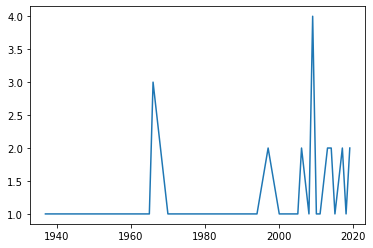

In [93]:
annees_triees.plot()

<AxesSubplot:ylabel='properties.ann_ouvert'>

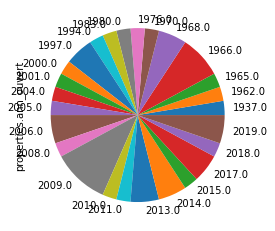

In [94]:
annees_triees.plot(kind = 'pie')

T'es gentil avec tes graphes, mais ils sont moches en fait
.
.
.
c'est pas faux

c'est donc là que plotly apparait

In [95]:
fig = px.line(annees_triees, x=annees_triees.index, y="properties.ann_ouvert", title='Nombre de parcs ouverts à Lyon par année')
fig.show()

Ouais, un joli dessin !

Eh mais attends, il est faux ton dessin, on a vu qu'il n'y avait pas d'ouverture de parcs dans les 40's et 50's

Bien vu l'aveugle. Prenons un autre type de représentations

In [96]:
fig_point =  go.Figure().add_trace(go.Scatter(mode='markers', x=annees_triees.index, y=annees_triees))
fig_point.show()

ou alors on peut choisir de compléteter les données avec des zéros

In [97]:
data_frame_prop['properties.ann_ouvert'].head()

0    1983.0
1       NaN
2       NaN
3    1937.0
4       NaN
Name: properties.ann_ouvert, dtype: float64

In [98]:
data_frame_prop['ann_ouvert-time'] = pd.to_datetime(data_frame_prop['properties.ann_ouvert'], format="%Y")
data_frame_prop['ann_ouvert-time'].head()

0   1983-01-01
1          NaT
2          NaT
3   1937-01-01
4          NaT
Name: ann_ouvert-time, dtype: datetime64[ns]

In [99]:
df_sans_nat = data_frame_prop.dropna()
df_sans_nat['ann_ouvert-time'].head()

0    1983-01-01
3    1937-01-01
10   2013-01-01
12   2006-01-01
16   2009-01-01
Name: ann_ouvert-time, dtype: datetime64[ns]

In [100]:
df_sans_nat.shape

(38, 30)

In [107]:
idx = pd.date_range('01-01-1937', '01-01-2021', freq='YS')

s = df_sans_nat['ann_ouvert-time'].value_counts().sort_values()
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(idx, fill_value=0)
s.head()

1937-01-01    1
1938-01-01    0
1939-01-01    0
1940-01-01    0
1941-01-01    0
Freq: AS-JAN, Name: ann_ouvert-time, dtype: int64

In [110]:
fig = px.line(s, x=s.index, y="ann_ouvert-time", title='Nombre de parcs ouverts à Lyon par année')
fig.show()

Sauvegardons notre travail dans un fichier

In [102]:
fig.write_html("parc-annees.html")

Quelles villes ont le plus de parc ?

In [103]:
# groupe_categorie = groupe.groupby(by=['newcat'], as_index=False)[['amount']].sum('amount')

groupe_ville = data_frame_prop.groupby(by=['properties.commune'], as_index=False).count()
groupe_ville.head()

,properties.commune,type,properties.uid,properties.id_ariane,properties.nom,properties.num,properties.numvoie,properties.voie,properties.codepost,properties.code_insee,properties.reglement,properties.surf_tot_m2,...,properties.circulation,properties.label,properties.type_equip,properties.eau,properties.toilettes,properties.chien,properties.esp_can,properties.photo,properties.gid,geometry.type,geometry.coordinates,ann_ouvert-time
0,Bron,8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8,8,2
1,Champagne-au-Mont-d'Or,6,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6,6,2
2,Lyon,296,296,296,296,296,296,296,296,296,296,296,...,296,296,296,296,296,296,296,296,296,296,296,24
3,Mions,7,7,7,7,7,7,7,7,7,7,5,...,7,7,7,7,7,7,7,7,7,7,7,0
4,Rillieux-la-Pape,8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8,8,0


In [104]:
fig_villes = px.pie(groupe_ville, values='properties.codepost', names='properties.commune', title='Nombre de parc par ville')
fig_villes.show()